In [12]:
import pandas as pd
import pickle 
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
H1 = pd.read_pickle('H1.pkl')

H1.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,Speech_str,Year
Washington_1790.txt,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,Washington_1790.txt,1790
Washington_1791.txt,0.0,0.00000,0.00324,0.22001,0.00182,0.00000,0.00000,0.00000,Washington_1791.txt,1791
Washington_1792.txt,0.0,0.00006,0.00129,0.21151,0.00469,0.00000,0.00000,0.00000,Washington_1792.txt,1792
Washington_1793.txt,0.0,0.00000,0.00287,0.18146,0.01530,0.00000,0.00517,0.00803,Washington_1793.txt,1793
Washington_1794.txt,0.0,0.00138,0.00000,0.17824,0.01485,0.01737,0.02184,0.01302,Washington_1794.txt,1794


In [14]:
H2 = H1
H2 = H2.drop(['Speech_str'], axis=1)

H2 = H2.drop(['Year'], axis=1) #drop year
H3 = H2.reset_index(drop=True) #reset index

H3.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.0,0.00000,0.00324,0.22001,0.00182,0.00000,0.00000,0.00000
2,0.0,0.00006,0.00129,0.21151,0.00469,0.00000,0.00000,0.00000
3,0.0,0.00000,0.00287,0.18146,0.01530,0.00000,0.00517,0.00803
4,0.0,0.00138,0.00000,0.17824,0.01485,0.01737,0.02184,0.01302


# Clustering the components using KMeans

In [15]:
from sklearn.cluster import KMeans


model = KMeans(n_clusters = 8)
model.fit(H3)
print (model.labels_)


H3['clust'] = pd.Series(model.labels_)
H3['Year'] = [(1790+i) for i in range(228)]
H3.head()

[5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 2 2 3 3 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 5
 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 7 7 7 7 7 7 7 7 7 5 7 7 7 7 7 7 1 7 7 7 7 7 7 7 7 7 7 7 7 4 7 4 7 4 1 4 4
 4 1 1 1 1 1 1 4 4 4 4 4 1 1 1 4 4 4 4 1 4 4 4 4 4 4 4 1 1 4 1 4 4 4 4 4 4
 4 4 4 1 1 4 4 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 6 6 6 6 6 6 6 0 0 0 0
 0 0 0 0 0 0]


,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,clust,Year
0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5,1790
1,0.0,0.00000,0.00324,0.22001,0.00182,0.00000,0.00000,0.00000,3,1791
2,0.0,0.00006,0.00129,0.21151,0.00469,0.00000,0.00000,0.00000,3,1792
3,0.0,0.00000,0.00287,0.18146,0.01530,0.00000,0.00517,0.00803,3,1793
4,0.0,0.00138,0.00000,0.17824,0.01485,0.01737,0.02184,0.01302,3,1794


In [16]:
H3.to_pickle("H3.pkl") #pickle file

# Scatter Plot: Speech Clusters/Year

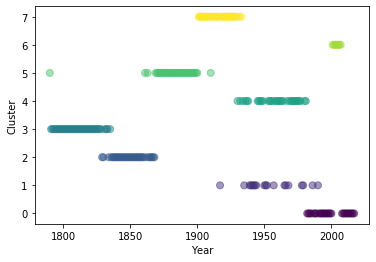

In [17]:
plt.scatter(H3['Year'], H3['clust'], c= model.labels_.astype(float), s=50, alpha=0.5)

plt.xlabel("Year") #of State of the Union speeches
plt.ylabel("Cluster")
plt.show() #Brian said he likes!

# Histogram of Clusters

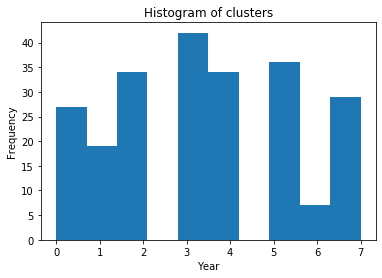

In [18]:
plt.hist(H3['clust'])
plt.title('Histogram of clusters')
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show() #visualization bug?